# 4.9 Intro to Data Visualization with Python
## -create bar chart
## -export visualizations
## -create histograms & scatterplots
### - remove outliers
## -create line chart
## - sampling data, (seed, dev, len)


# Import libraries, including new libraries for Visualizations

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import dataset

In [2]:
path = r'/Users/nancykray/Desktop/Instacart Basket Analysis'

In [3]:
ords_prods_merge=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','ords_prods_grouped.pkl'))

In [4]:
#check shape
ords_prods_merge.shape

(32404859, 25)

# Create bar chart

<Axes: xlabel='orders_day_of_week'>

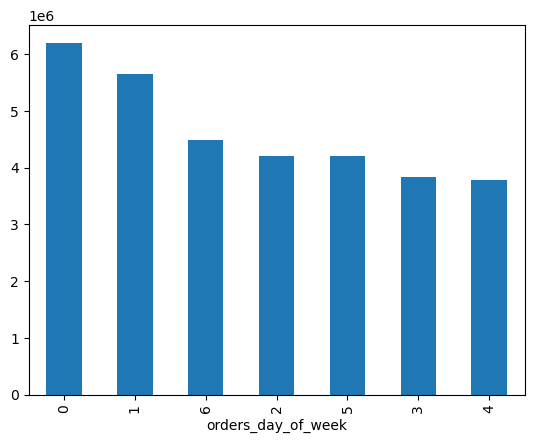

In [5]:
#this will sort automatically from largest to smallest 
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

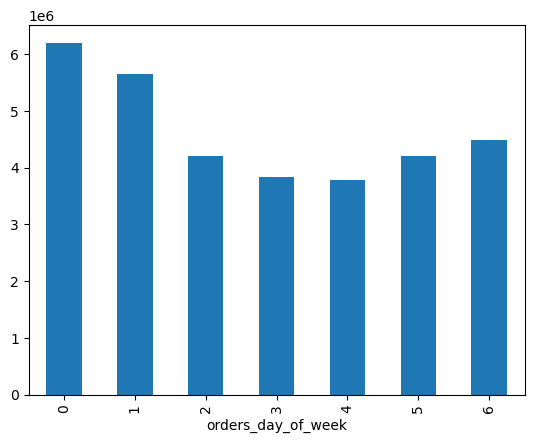

In [6]:
#to sort by index order insteady, insert sort_index() after value_counts() as follows:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
#the same trick can be used when printing frequencies
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [8]:
#now print the frequencies in index order by inserting sort_index()
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

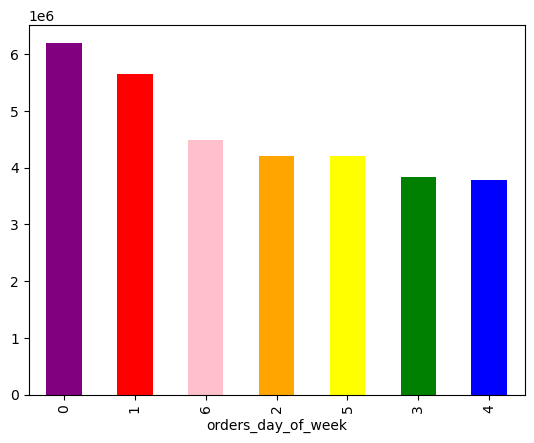

In [9]:
#add color to bar chart by listing colors (color = ['', '', ''])
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color= ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

######    *remember that colors in bar chart are not entirely useful: this example was for understanding how to apply colors in charts

######   *There are many other arguments you can add to your plot.bar() function to change and tweak the final output for your chart. While we won’t discuss all of them here, if you’re interested, you can do some online digging

# Exporting Visualizations

### The code used above generated a preview for your visualization but didn’t actually save it in Jupyter’s memory. You’ll need to update your command to change this:

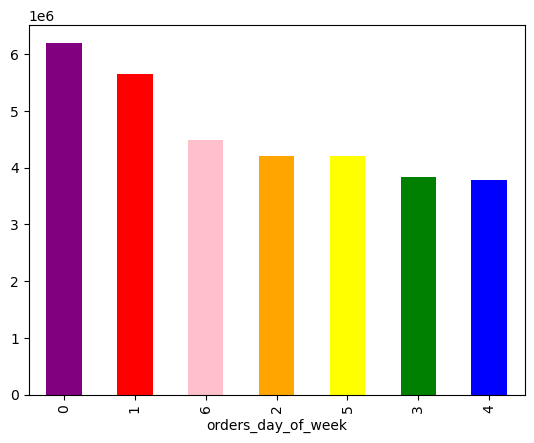

In [10]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

### Now, your bar chart has been saved within the bar object (when started with bar = ...), and you’ll be able to access it any time you like by calling bar.figure. The next step is to export it outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function:

In [11]:
#export the bar chart above outside of Jupyter in the form of an image files in form of figure.savefig() function:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### The above command accesses the figure within the bar object and applies the savefig() function to it, which, as you might imagine, is what “saves” the “figure” to a file. Within the parentheses, you should see some familiar syntax—it’s pointing to a location on your computer in which to save your new file. Here, you’ll create a new “Visualizations” folder within your “‘04 Analysis” folder, which is where you can save all the future visualizations you’ll be exporting for this project.

# Creating Histograms and Scatterplots

### -HISTOGRAM

#### As you’ll remember from Achievement 2, histograms are used to show the density of a continuous variable—the distribution of observations per their occurrence in a data set. This is different from bar charts as bar charts organize observations according to some category. That’s why bar charts are good for categorical data and histograms are more appropriate for continuous data.



<Axes: ylabel='Frequency'>

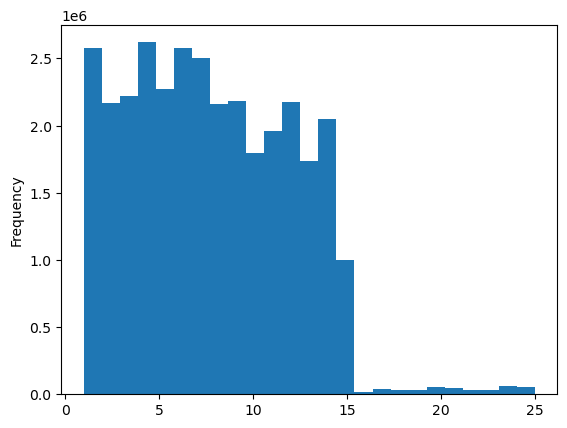

In [12]:
#create a histogram of the “prices” column with the following code:
ords_prods_merge['prices'].plot.hist(bins = 25)

##### Something doesn’t seem right here. You should have gotten 25 bars (one for each bin). Instead, however, you’ve gotten one single column. The reason for this has a lot to do with the data prep stage. Let’s jump back a few steps to one of the first data integrity checks you conducted. Back in Exercise 4.5: Data Consistency Checks, you ran the describe() function against your “prices” column and produced the following output:

In [13]:
ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

##### *the max value is off. Let's run codes to further look into each descriptive statistic:

In [14]:
ords_prods_merge['prices'].mean()

7.790994092173371

In [15]:
ords_prods_merge['prices'].median()

7.4

In [16]:
ords_prods_merge['prices'].max()

25.0

##### While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result. How could an item cost $99,999.00? 

This must be the result of data corruption or some kind of special value within the data. This is also what’s breaking your histogram—having most values between 7 and 12 (see the median and mean again) but an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one.

### - SCATTERPLOT
#####As you learned in Achievement 2, another way to explore your data is to create a scatterplot. Normally, you’d use scatterplots to investigate the relationship between two variables. However, when conducting an exploratory analysis, you can also use scatterplots to visualize the distribution of data points in order to identify any outliers. To do this for the current example, let’s try plotting the “prices” column against itself. This will reveal whether there are any outliers.

<Axes: xlabel='prices', ylabel='prices'>

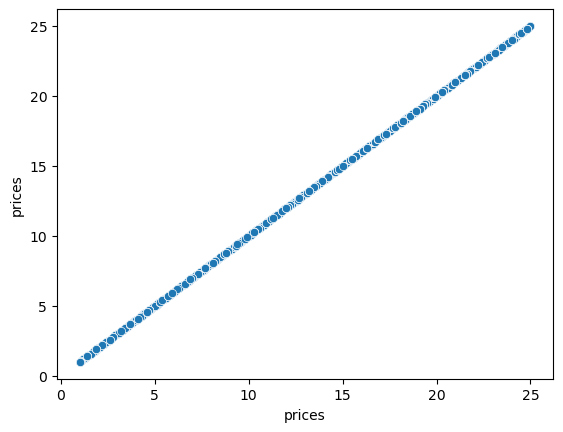

In [17]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)


##### Here, the “prices” column has been used for both the x- and y-axes. The mean of the column is around 12, so you’d expect the data points to be distributed somewhere around this number. However, there are two data points far, far beyond values you’d ever expect—values close to 20,000 and even 100,000. This close-to-100,000 value corresponds to the max value you identified in your checks. But what about the close-to-20,000 value? To investigate this, you can run a few more exploratory checks on your data.

Let’s first determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item. If you imagined the maximum price anyone would pay in a supermarket were around $100, then anything above that amount could be considered an outlier. Run this check via the following code:



In [18]:
#looking for outliers (since the peopel wouldn't usually spend over 100 dollars at supermarket)
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,customer_frequency,frequency_flag


In [19]:
#I couldn't find the price column but knew it was there (25 columns were not showing) so I found this code (google):
pd.set_option("display.max_columns", 100)

In [20]:
#now, I can see the prices column! YAY!
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,customer_frequency,frequency_flag
0,2539329,1,1,2,8,NaN,First Order,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer
1,2398795,1,2,3,7,15.0,Repeat Customer,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer
2,473747,1,3,3,12,21.0,Repeat Customer,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer
3,2254736,1,4,4,7,29.0,Repeat Customer,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer
4,431534,1,5,4,15,28.0,Repeat Customer,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer


In [21]:
#so now let me look again at the code I ran prior (In [21]) to see if I can look at the prices column:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,customer_frequency,frequency_flag


##### From the output, you can see that there are 5,127 rows with outlier observations (prices greater than 100 dollars). In addition, at the top of the “prices” column, you can see that there’s another odd value, 14,900.00 dollars, which corresponds to the second unexplainable point in the scatterplot. Following this is the 99,999.00 dollars you identified previously. As such, you can assume that it’s the 14,900.00 dollars and 99,999.00  dollars values that are skewing your charts.

##### This was a practical example of why you should be very pedantic about conducting your data quality checks—as well as how visualizations can help you explore your data. You should never leave an issue like this unfixed as it could very well blow up in your face at some point and spoil the results you’re trying to achieve. A first likely step would be to consult your client or a more senior stakeholder for guidance on how to treat these values. They might, for instance, be special values within the Instacart system.

For now, let’s mark them as missing since they don’t make sense in terms of the other values in the column. To turn them into NaNs, use the following code:



In [22]:
#turn outliers (all values over 100 dollars in the price column) into NaNs
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [23]:
#now lets check the max value in the price column since we removed the values over 100
ords_prods_merge['prices'].max()

25.0

Perfect. Logically, you know that a 25 dollar grocery item is much more likely than a 14,900 dollar item (and especially a 99,999 dollar item!).

## HISTOGRAM (now that outliers are removed)

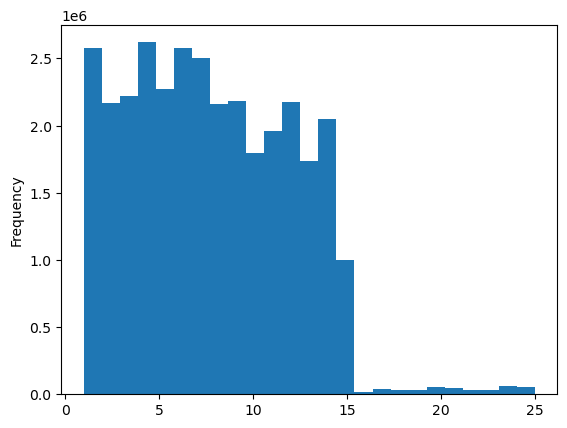

In [24]:
hist=ords_prods_merge['prices'].plot.hist(bins = 25)

##### Your results make much more sense now: most products are between 1  and 15 dollars, while a few are higher priced at 15 to 25 dollars. To increase the level of granularity in the histogram, simply increase the number of bins to, say, 70. This will result in a histogram with more, thinner columns:



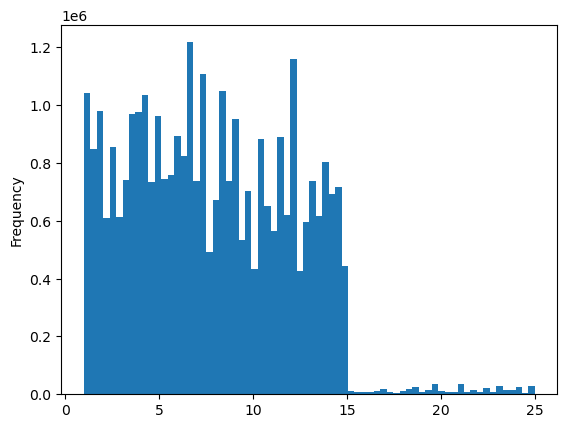

In [25]:
#now run same code but increase to bins of 70
hist_2=ords_prods_merge['prices'].plot.hist(bins = 70)

# Export the histograms hist and hist_2
### -used the same code as above for bar charts, but changed 'bar' to 'hist' and 'hist_2'

In [26]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

In [27]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_2_orders_dow.png'))

# Creating Line Charts

Since you don’t have dates that could indicate a timeline in your Instacart data, you won’t be able to test this out on your project just yet. You could, however, test out a different type of line chart, such as the development of the “prices” column across the days of the week. To achieve this, you’d plot the “orders_day_of_week” column on the x-axis and the “prices” column on the y-axis.

There is, however, one major caveat: this line chart will require a great deal of computing power due to the number of unique values in the “prices” column. As such, you’re likely to get a memory error and/or have your browser crash (if you have a machine with less than 16GB RAM maybe keep in mind that attempting this will cost you time to reset and start over). To avoid this, you can use the subsetting method you should be familiar with by now. For example, you might consider only plotting the top or bottom 2,000,000 rows of your dataframe:


In [28]:
#set up a subset to avoid crashing with too much data
df = ords_prods_merge[:2000000]

But does this work? The answer is, well, no. That’s because this subset wouldn’t be representative of the entire population. How, then, do you tackle a problem like this? The answer is simple—sampling!



## Sampling Data

n order to create a subset that actually represents the entirety of your data, you’d need more than just the first 2,000,000 rows. And, more importantly, those rows would need to be randomized. You can’t simply choose from the first or last customers in the dataframe—it needs to be a random assortment taken from all throughout the dataframe. Only then can you be sure it accurately represents the dataframe as a whole.

The first step, then, is to create some random samples. A sample, as you learned back in Achievement 1, is a representative subsection of a population. In this case, you can split your dataframe into two samples with the same distribution, for instance an 80/20 or 70/30 split. If done correctly, both samples would have an equal proportion of data. In a 70/30 split, for example, the 30 percent sample would statistically resemble the 70 percent sample but contain less rows. You can then create charts from these samples the same as you would any other subset, the only difference being that you know these subsets accurately represent the entire dataframe as a whole.

This is a standard approach in machine learning. When training a model, you’d normally use 80 percent of a data set to train the algorithm and the remaining 20 percent to check the accuracy of the model.

Creating these samples requires a list of random floating numbers between 0 and 1 (with 1 representing 100 percent of the dataframe) that’s as long as the length of the dataframe. Each row in the dataframe is “assigned” one of these numbers, and then the numbers are compared to a value. In this case, the value is 0.7, since you want a 70/30 split. Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratio. This all sounds a little abstract. Let’s see how it works in practice:

In [29]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In the first line of the command, you set the “seed.” This “seed” represents a random but reproducible pattern—Python will always give you the same set of random numbers (in this case, seed “4”) rather than creating a new pattern of numbers every time you run the command. You don’t want that as your example needs to be reproducible by you and other analysts.

(WHAT’S IN A SEED?)
The value you put inside the seed doesn’t actually matter in the grand scheme of things. Whether you use 1, 52, 179, or 4, all you’re doing is ensuring that the random distribution you’re creating is reproducible. This is all a bit complex and falls outside the scope of this Exercise, but if you want to read more about seeds, take a look at this thread on the fast.ai forums: What does np.random.seed(2) do?

The seed is set via the NumPy function random.seed(). We’ve set the seed to 4 for now. Feel free to do so as you follow along to ensure you’re using the same random pattern of numbers as in the examples. 

Then, in the second line of the command, you create a new list called dev. This will be what stores your boolean values—you’ll be getting an output of True or False for every value based on whether it’s less than or equal to 0.7:

In [30]:
dev

array([False,  True, False, ...,  True,  True,  True])

You conducted tests like this before, such as when you used logical operators to set the conditions for your derived columns in Exercise 4.7: Deriving New Variables. 

What’s new, however, is the np.random.rand() function being used as your argument. This function is what will actually create your list of random floating numbers between 0 and 1. The np at the beginning stands for the NumPy library, the random in the middle is a function that creates random numbers, and the rand at the end is a function that ensures the random numbers generated by random follow the uniform distribution. 

Uniform distribution simply means that there should be an equal chance for every number between 0 and 1 to occur in the distribution.

Within the brackets of this function, you’ll see len(ords_prods_merge). This len() produces a value that represents the length of whatever you put inside it. By passing your dataframe, you’ll receive an output of 32,404,859, which is how many rows are in your dataframe. Here’s a simple example of np.random.rand() to help you better picture what the function does:



In [31]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

###### As you can see, the np.random.rand() function produces a list of random numbers between 0 and 1. Here, the argument is 10, so 10 random numbers are produced. In the code above, the argument given is the length of your dataframe, so 32,434,212 numbers are produced.

So, to recap each piece of the split code, you need to:

1. Set the seed for the random number generator.
2. Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
3. Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
4. Store the results of the test in a new list, dev, in the form of boolean values (True and False).

You now have a list of 32,434,212 boolean values and a dataframe that’s 32,434,212 rows long. How can you use your list to split your dataframe into two samples? This will involve an elegant hack:

big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

The two dataframes above, big and small, are the samples you’ll create from your ords_prods_merge dataframe. What you want to do is store 70 percent of your dataframe in the big sample and 30 percent of your dataframe in the small sample. You’ll do this according to the values in your dev list. For every value in the list that’s True, the corresponding row in your ords_prods_merge dataframe will be stored in the big sample. For every value in the list that’s False, the corresponding row in your dataframe will be stored in the small sample. Since True and False were determined by whether or not the random number was less than or greater than 0.7, this means that 70 percent of the rows should logically be sorted into big and 30 percent of the rows should logically be sorted into small. The tilde you see in the second line negates the argument, in other words, it stores everything that’s not dev, or False.



In [32]:
#now let's run it in Jupyter:
#create a list holding True/False values to the test np.random.rant()<=.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7


In [33]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [34]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

Great! Before racing immediately to create your chart, however, it’s always good to stop for a moment and check that you’ve achieved the results you expected. What would you expect to see in your two new sample subsets? Well, if big is 70 percent of ords_prds_merge and small is 30 percent of ords_prods_merge then, theoretically, if you added the rows of both samples together, you’d get the same numbers of rows as your original ords_prods_merge dataframe. Let’s give it a try using the len() function again:

In [35]:
len(ords_prods_merge)

32404859

In [36]:
len(big) + len(small)

32404859

Since the numbers match, you can assume that your subsetting procedure was at least successful in the technical sense. After creating a line chart from your samples, you’ll be able to determine whether they’re accurate representations of the original dataframe, as well.

As one last step before creating that chart, let’s do something that will speed up the processing time even further—reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.” You can achieve this by running (and checking the result!) of the following command:

In [37]:
#This creates a new dataframe, df_2, that contains only the “prices” and “orders_day_of_week” 
#columns from your small subset.
df_2 = small[['orders_day_of_week', 'prices']]

### now you are finally ready to create your chart:

Here, the sns.lineplot() function (from the seaborn library) is being used to create the line chart and save it to a new object, line. The arguments it needs are the dataframe you want to create the line chart from (df_2), the column you want to place on the x-axis (“orders_day_of_week”), and the column you want to place on the y-axis (“prices”). Let’s see what your final chart looks like:

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


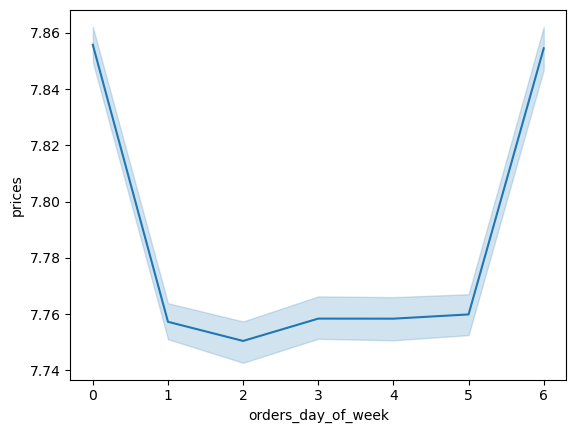

In [38]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

You should see your days of the week on the bottom and a range of product prices on the left. The blue line, then, represents how prices differ depending on the day of the week. The peaks on days zero and six mean that most money is spent on Friday and Saturday. This might be due to people stocking up on things before the weekend.

You may be wondering what those translucent blue bands are around your line. Those are called error bands, and they represent the chart’s confidence intervals. In other words, if this line were a prediction, there would be a 95 percent probability that the predicted value would fall within the area of the error bands.

You’ve now created a line plot from a representative sample of your dataframe in order to avoid potential memory errors. Earlier on in this Exercise, you learned that using a subset of rows from the bottom or top of a dataframe wasn’t representative. But how do you know for a fact that the new line chart you’ve created is? The best way to check is to compare the line chart of your subset with the line chart of the entire dataframe (or even the big sample). For instance, the line chart of your entire dataframe would look like this:

Running the codes below should give the same shape to show that the sample represents the whole dataset, but this takes a lot of space.  I therefore did not run, but the results show the same line as above (from the lesson)

In [40]:
#df_4=ords_prods_merge[['orders_days_of_the_week', 'prices']]

#line_2=sns.lineplot(data = df_4, x = 'orders_day_of_week',y = 'prices')

#Thankfully, the shape of the line chart for the entire dataframe looks very similar 
#to the shape of the line chart for your subset.  That means your subset is an accurate 
#representation of the entire dataframe. Congrats!